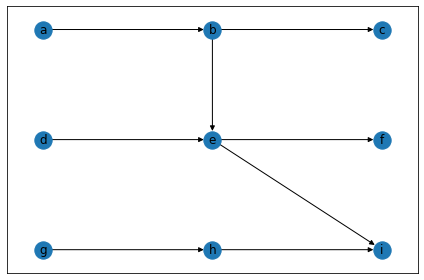

In [1]:
from datalife import get_critical_path, remove_cpath_from_graph, caterpillar_tree, find_caterpillar_forest

import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

G = nx.DiGraph(
    [
        ("a", "b"),
        ('d', 'e'),        
        ('g','h'),
        ('b','e'),
        ('b','c'),
        ('e','f'),
        ('e','i'),
        ('h','i')
    ]
)

pos= { 'a': [0,0],
     'b': [1,0],
     'c': [2,0],
     'd':[0,-1],
      'e': [1,-1],
     'f':[2,-1],
     'g':[0,-2],
     'h':[1,-2],
     'i':[2,-2]}
fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)
fig.tight_layout()
plt.show()

In [2]:
default_weight = 1
for n in G.edges():
    G.add_edge(n[0], n[1], weight=1)

G.add_weighted_edges_from([('d','e',2),('e','f',3)])

In [3]:
cpath = get_critical_path(G)
cpath

['d', 'e', 'f']

In [4]:
ct = caterpillar_tree(G, cpath)

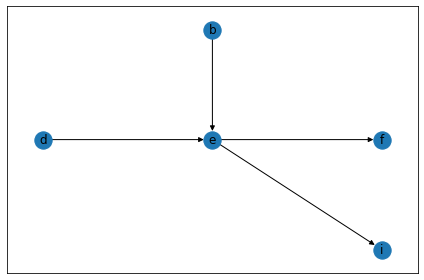

In [5]:
fig, ax = plt.subplots()
nx.draw_networkx(ct, pos=pos, ax=ax)
fig.tight_layout()
plt.show()

In [6]:
removed_g = remove_cpath_from_graph(G, cpath)

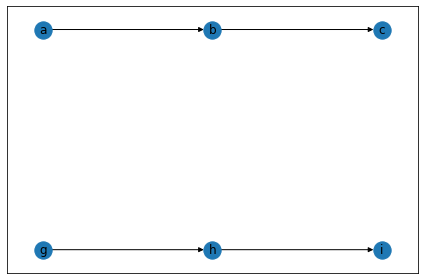

In [7]:
fig, ax = plt.subplots()
nx.draw_networkx(removed_g, pos=pos, ax=ax)
fig.tight_layout()
plt.show()

In [8]:
# find_caterpillar_forest in code
def find_caterpillar_forest(G):
    CT_s = []
    dependent_edges = []
    cf = nx.DiGraph()
    while(G.nodes or G.edges):
        # find a critical path
        cpath = get_critical_path(G)
        # extract the CT along the critical path
        CT_c = caterpillar_tree(G, cpath)
        # Remove the vertices and edges only along the critical path
        removed_g = remove_cpath_from_graph(G, cpath)        
        # (find dependencies across CT_s) for each of the vertices,
        # v_c on the critical path of the current caterpillar tree, CT_c
        for ct_i in CT_s:
            for node in CT_c.nodes:
                # if there is an edge between v_p and v_c, 
                # add a dependency edge between CT_c  and ct_i
                o_edges = ct_i.out_edges(node)
                i_edges = ct_i.in_edges(node)
                tmp = list(o_edges) + list(i_edges)
                dependent_edges += tmp
                if len(tmp) > 0:
                    if(len(o_edges) > 0):
                        cf.add_edge(CT_c, ct_i)
                    if(len(i_edges) > 0):
                        cf.add_edge(ct_i, CT_c)
        
        dependent_edges = list(set(dependent_edges))
        CT_s.append(CT_c)
        G = removed_g
    return (cf, dependent_edges)

In [9]:
cf, dependent_edges = find_caterpillar_forest(G)
cf, dependent_edges

(<networkx.classes.digraph.DiGraph at 0x7ff634641450>,
 [('b', 'e'), ('e', 'i')])

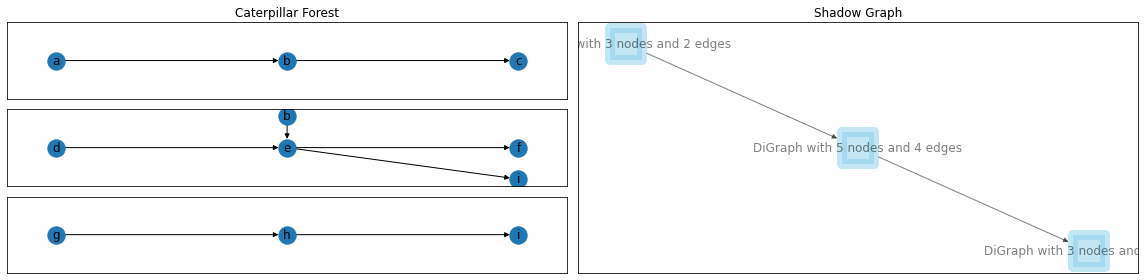

In [10]:
fig = plt.figure(figsize=(16,4))

gs = fig.add_gridspec(3,2)
ax={}
i=0
ax[i] = fig.add_subplot(gs[0, 0])
i+=1
ax[i] = fig.add_subplot(gs[1, 0])
i+=1
ax[i] = fig.add_subplot(gs[2, 0])
i+=1
ax[i] = fig.add_subplot(gs[:, 1])

i = 0
ax[i].set_title('Caterpillar Forest')
for n in cf.nodes:
    nx.draw_networkx(n, pos=pos, ax=ax[i])
    i+=1
    #cf.add_node(n, pos=(i,-i))
    cf.add_node(n, pos=(i,-i))

_pos = {}
for x in cf.nodes(data=True):
    _pos[x[0]] = list(x[1]['pos'])

ax[i].set_title('Shadow Graph')
nx.draw_networkx(cf, pos=_pos, with_labels=True, ax=ax[i], node_size=1000, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
fig.tight_layout()
plt.show()

In [11]:
for n in cf.nodes:
    i+=1
    #cf.add_node(n, pos=(i,-i))
    cf.add_node(n, pos=(0,-i))

_pos = {}
for x in cf.nodes(data=True):
    _pos[x[0]] = list(x[1]['pos'])

    
lvl_ = {}
level = 0
for snode in cf.nodes:
    lvl_[level] = snode
    level += 1
    
#root 1 
lvl0_copy = lvl_[0].copy()
lvl1_copy = lvl_[1].copy()
lvl2_copy = lvl_[2].copy()

cf.add_edge(lvl0_copy, lvl1_copy)
cf.add_edge(lvl1_copy, lvl_[2])

_pos[lvl0_copy] = [_pos[lvl_[0]][0] + 1, _pos[lvl_[0]][1]]
_pos[lvl1_copy] = [_pos[lvl_[1]][0] + 1, _pos[lvl_[1]][1]] 

# root 2
lvl0_copy2 = lvl_[0].copy()
lvl1_copy2 = lvl_[1].copy()
#lvl2_copy2 = lvl_[2].copy()

cf.add_edge(lvl0_copy2, lvl1_copy2)
cf.add_edge(lvl0_copy2, lvl1_copy)

_pos[lvl0_copy2] = [_pos[lvl_[0]][0] + 2, _pos[lvl_[0]][1]] 
_pos[lvl1_copy2] = [_pos[lvl_[1]][0] + 2, _pos[lvl_[1]][1]] 

Text(1.2, 0.1, 'level 2')

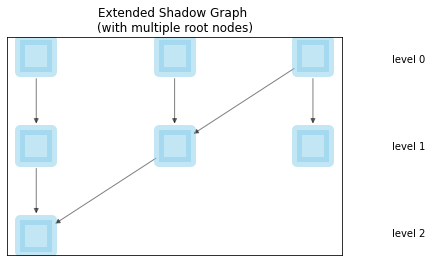

In [12]:
fig, ax = plt.subplots()
ax.set_title('Extended Shadow Graph \n(with multiple root nodes)')
nx.draw_networkx(cf, with_labels=False, pos=_pos, node_size=1000, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
plt.text(1.2, 0.9, 'level 0', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)
plt.text(1.2, 0.5, 'level 1', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)
plt.text(1.2, 0.1, 'level 2', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

### how many CTs depend on the current CT

In [13]:
def get_roots(G):
    roots = []
    for ct_node in G.nodes:
        pred_iter = G.predecessors(ct_node)
        pred_l = [x for x in pred_iter]
        if len(pred_l) == 0:
            roots.append(ct_node)
    return roots

In [14]:
roots = get_roots(cf)
roots

In [15]:
def get_dependent_ct_count(G, ct_list):
    res = {}
    for ct in ct_list:
        succ_iter = G.successors(ct)
        succ_l = [x for x in succ_iter]
        res[ct] = len(succ_l)
    return res

In [16]:
cts_with_cnt = get_dependent_ct_count(cf, roots)
idx = 0
for root in roots:
    print("root [{}] has dependent ct: {}".format(idx, cts_with_cnt[roots[idx]]))
    idx += 1

root [0] has dependent ct: 1
root [1] has dependent ct: 1
root [2] has dependent ct: 2


### Within a CT, how many tasks can be executed before waiting for a dependency to be fulfilled (no of hops before first stall)

In [17]:
def get_first_stalls(G, d_edges):
    d_edges_flattened = []
    for edge in d_edges:
        d_edges_flattened += edge
    d_edges_flattened = list(set(d_edges_flattened))
    found_node = None
    for node in d_edges_flattened:
        tmp = G.edges(node)
        if len(tmp) > 0:
            found_node = node
            break
    first_stalls = []            
    if found_node is not None:
        tmp = [found_node]
        while (tmp):
            curr = tmp.pop()
            pred_iter = G.predecessors(curr)
            pred_l = [x for x in pred_iter]
            if len(pred_l) > 0:
                tmp = pred_l
                first_stalls += pred_l
    return first_stalls

In [18]:
res = []
for root in roots:
    root_first_stalls = get_first_stalls(root, dependent_edges)
    res.append((root, len(root_first_stalls)))

In [19]:
idx = 0
for r in res:
    print ('first stall count of root {}: {}'.format(idx, r[1]))
    idx += 1

first stall count of root 0: 1
first stall count of root 1: 1
first stall count of root 2: 1


### Sum of the edge “metric” along the current CT edges (for example data volume)

In [20]:
def get_edge_attributes(G, metric='value'):
    return [x[2][metric] for x in G.edges(data=True)]
get_edge_attributes(roots[1], 'value')

[1, 1]

### Associate vertex priority to each of the vertices in the shadow graph

In [21]:
def find_vertex_priority(cforest, G_list, dependent_edges, metric='value', op='sum'):
    cts_cnt = get_dependent_ct_count(cforest, G_list)
    res = {}
    for G in G_list:
        first_stalls = get_first_stalls(G, dependent_edges)
        attrs = get_edge_attributes(G, metric)
        func = getattr(np, op)
        mvalue = func(attrs)
        res[G] = (cts_cnt[G], len(first_stalls), mvalue)
    return res

In [22]:
vertex_priorities = find_vertex_priority(cf, roots, dependent_edges)
vertex_priorities

{<networkx.classes.digraph.DiGraph at 0x7ff634641490>: (1, 1, 2),
 <networkx.classes.digraph.DiGraph at 0x7ff638a6b2d0>: (1, 1, 2),
 <networkx.classes.digraph.DiGraph at 0x7ff638a6b290>: (2, 1, 2)}

### vertices within the same level will be prioritized for resource allocation based on their priority

In [23]:
{k: v for k, v in sorted(vertex_priorities.items(), key=lambda item: item[1], reverse=True)}

{<networkx.classes.digraph.DiGraph at 0x7ff638a6b290>: (2, 1, 2),
 <networkx.classes.digraph.DiGraph at 0x7ff634641490>: (1, 1, 2),
 <networkx.classes.digraph.DiGraph at 0x7ff638a6b2d0>: (1, 1, 2)}

In [24]:
current_queue = [(k, v) for k, v in sorted(vertex_priorities.items(), key=lambda item: item[1], reverse=True)]

In [25]:
current_queue

[(<networkx.classes.digraph.DiGraph at 0x7ff638a6b290>, (2, 1, 2)),
 (<networkx.classes.digraph.DiGraph at 0x7ff634641490>, (1, 1, 2)),
 (<networkx.classes.digraph.DiGraph at 0x7ff638a6b2d0>, (1, 1, 2))]

In [26]:
def check_resource_req(G, resource_grp = {'cpu': 1, 'gpu': 0, 'data': 1024*1024}):
    '''return total sum value of concurrent vertex resource attributes'''
    resource_max = resource_grp.copy()
    for vertex in G.nodes:
        for n in nx.neighbors(G, vertex):
            resource_tmp = {k: 0 for k, v in resource_grp.items()}
            for k, v in resource_grp.items():
                if k in G.nodes[n]:
                    resource_tmp[k] += G.nodes[n][k]
                else:
                    resource_tmp[k] += resource_grp[k] # default val
        for k, v in resource_grp.items():
            resource_max[k] = max(resource_max[k], resource_tmp[k])
    return resource_max     

In [27]:
import pandas as pd

res_dict = {'node_1': [4, 0, 1024*1024*100], 'node_2': [8, 0, 1024*1024*10], 'node_3': [4, 1, 1024*1024*50]}
res_df = pd.DataFrame.from_dict(res_dict, orient='index',
                       columns=['cpu', 'gpu', 'data'])
res_capacity = res_df.copy()
res_df

,cpu,gpu,data
node_1,4,0,104857600
node_2,8,0,10485760
node_3,4,1,52428800


## Request resource function rf

In [35]:
def get_resource_pool():
    return res_df

def update_resource_pool(df, rtype, rdata):
    if rtype == 'acquisition':
        for k, v in rdata.items():
            df.loc[rdata.name][k] -= rdata[k]
    elif rtype == 'release':
        for k, v in rdata.items():
            df.loc[rdata.name][k] += rdata[k]
    return df

def request_resource_func(df, rgroup):
    """
    Arguments:
        rgroup (dict): required resources
    Returns:
        res (DataFrame): available resource (row)
    """
    res = df
    for k, v in rgroup.items():
        res = res.loc[df[k] >= v]
    return res.iloc[0]

In [29]:
requested_rsize = {'cpu': 5, 'gpu':0, 'data': 1024*1024*2}
requested_size = pd.Series(requested_rsize, name='node_2')
update_resource_pool(res_df, 'acquisition', requested_size)

,cpu,gpu,data
node_1,4,0,104857600
node_2,3,0,8388608
node_3,4,1,52428800


In [30]:
update_resource_pool(res_df, 'release', requested_size)

,cpu,gpu,data
node_1,4,0,104857600
node_2,8,0,10485760
node_3,4,1,52428800


In [38]:
def bfs_level_sync(G, current_queue):
    while current_queue:
        for vertex in current_queue:
            required_resources = check_resource_req(vertex)
            res_df = get_resource_pool()
            res_avail = request_resource_func(res_df, required_resources)
            res_df_updated = update_resource_pool(res_df, 'acquisition', res_avail)
            # task assignment
            print(res_df_updated)
            res_df_updated = update_resource_pool(res_df, 'release', res_avail)
            print(res_df_updated)
            break
        break
bfs_level_sync(G, [x[0] for x in current_queue])

        cpu  gpu      data
node_1    0    0         0
node_2    8    0  10485760
node_3    4    1  52428800
        cpu  gpu       data
node_1    4    0  104857600
node_2    8    0   10485760
node_3    4    1   52428800
